## Datacamp: Exploratory Data Analysis in Python

### Part 3 Notebook: Relationships

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Pmf
#pip install empiricaldist    #pip install empiricaldist to access Pmf
%matplotlib inline

### Scatter Plots:

In [20]:
#Scatter Plot

brfss = pd.read_hdf('Data/brfss.hdf5', 'brfss')
height = brfss['HTM4']
weight = brfss['WTKG3']

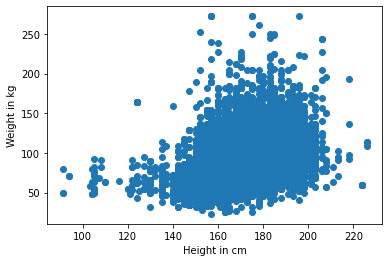

In [21]:
# Create Scatter plot

plt.plot(height, weight, 'o')
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.show()

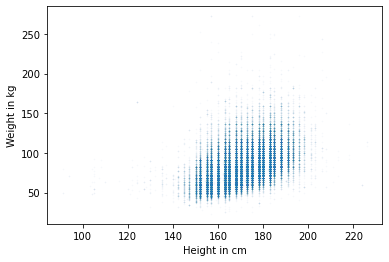

In [22]:
# Create a more visual Scatter plot 

plt.plot(height, weight, 'o', markersize=1, alpha=0.02)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.show()

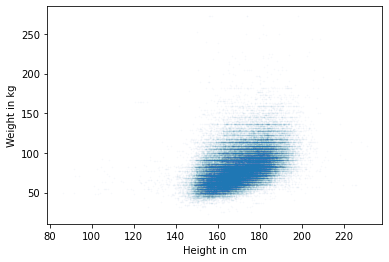

In [23]:
# Use of Jittering for HEIGHT to add 'noise' to fill in rounded off numbers

height_jitter = height + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight, 'o', markersize=1, alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

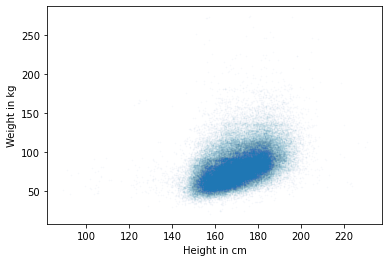

In [24]:
# Add Jittering of WEIGHT to plot

height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

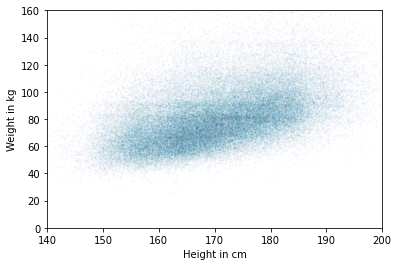

In [25]:
# Zoom using pyplot Axis

plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

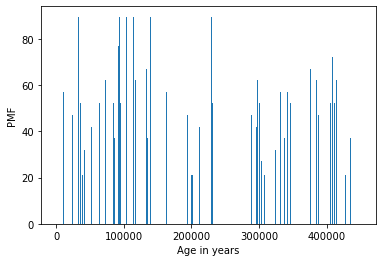

In [27]:
# Extract age
age = brfss['AGE']

# Plot the PMF
pmf_age = Pmf(age)
pmf_age.bar()

# Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

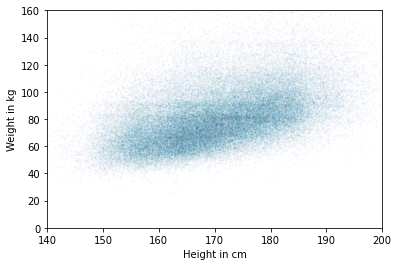

In [28]:
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

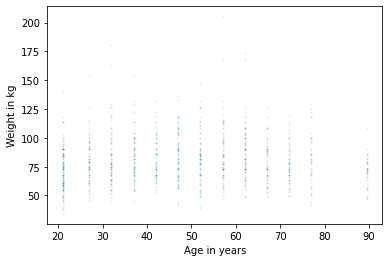

In [29]:
# Select the first 1000 respondents
brfss = brfss[:1000]

# Extract age and weight
age = brfss['AGE']
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=1, alpha=0.1)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

plt.show()

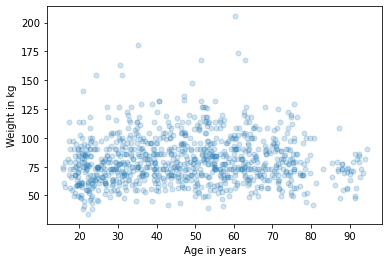

In [30]:
## Add Jittering to smooth out columns

# Select the first 1000 respondents
brfss = brfss[:1000]

# Add jittering to age
age = brfss['AGE'] + np.random.normal(0,2.5, size=len(brfss))

# Extract weight
weight = brfss['WTKG3']

# Make a scatter plot
plt.plot(age, weight, 'o', markersize=5, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

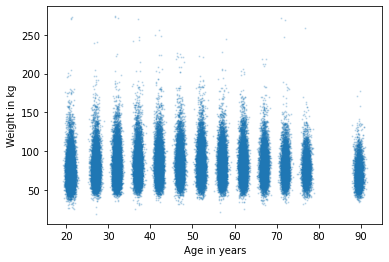

In [42]:
# Create Scatter plot using ALL of the data from brfss DataFrame

# Load all data
brfss = pd.read_hdf('Data/brfss.hdf5', 'brfss')

# Add jittering
age = brfss['AGE'] + np.random.normal(0, 0.5, size=len(brfss))
weight = brfss['WTKG3'] + np.random.normal(0, 2, size=len(brfss))

# Make scatter plot
plt.plot(age, weight, 'o', markersize=1, alpha=0.2)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')
plt.show()

## Seaborn library

In [47]:
# Import Seaborn library

import seaborn as sns

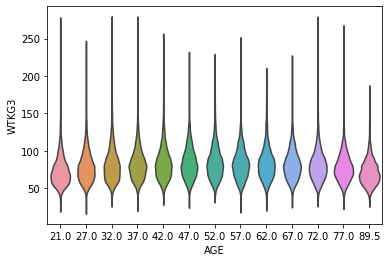

In [50]:
#Violin Plot

data = brfss.dropna(subset=['AGE', 'WTKG3'])
sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)
plt.show()

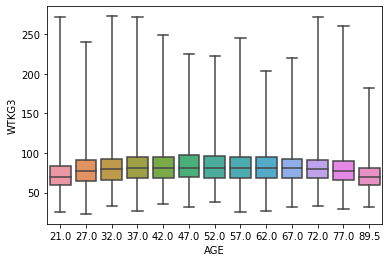

In [53]:
#Box Plot

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.show()

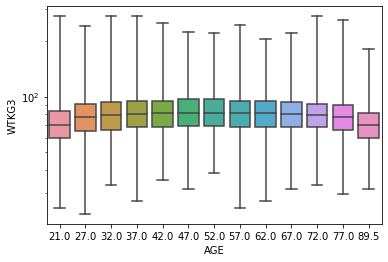

In [54]:
# View data on Log scale

sns.boxplot(x='AGE', y='WTKG3', data=data, whis=10)
plt.yscale('log')
plt.show()

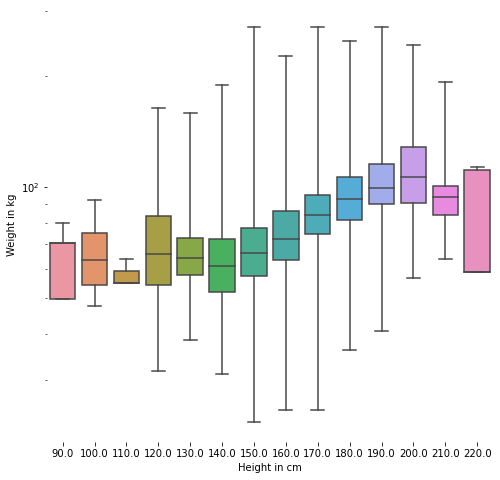

In [74]:
# Height and weight

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
plt.figure(figsize=(8,8))
sns.boxplot(x='_HTMG10', y='WTKG3', data=data, whis=10)


# Plot the y-axis on a log scale

plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()

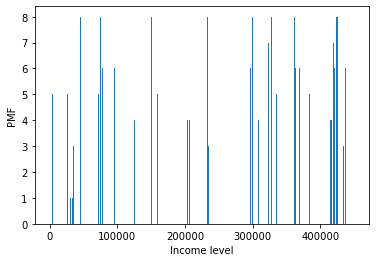

In [75]:
#Distribution of income

# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

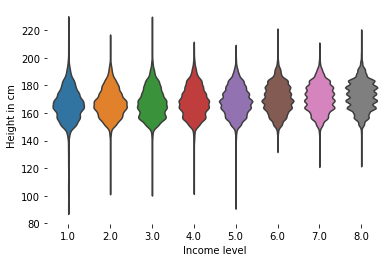

In [76]:
#Income and height

# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot

sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## Correlation:
### (Pearson's correlation coefficient)

In [80]:
#Look at Correlations between columns

columns = ['HTM4', 'WTKG3', 'AGE']
subset = brfss[columns]
subset.corr()

,HTM4,WTKG3,AGE
HTM4,1.000000,0.474203,-0.093684
WTKG3,0.474203,1.000000,0.021641
AGE,-0.093684,0.021641,1.000000


## Linear Regression:

LinregressResult(slope=-0.07098223664851823, intercept=0.010093317917235745, rvalue=-0.060171871921997244, pvalue=0.6780728880272896, stderr=0.1699604596350538, intercept_stderr=0.30032782596593727)


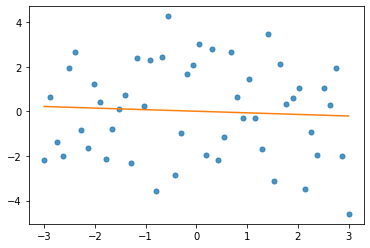

In [165]:
#Random Generated data for regression
from scipy.stats import linregress, norm

xs = np.linspace(-3, 3)
ys = np.random.normal(0, 2, size=len(xs))

res = linregress(xs, ys)
print(res)

# Simple scatter plot
plt.plot(xs, ys, 'o', markersize=5, alpha=.8)

fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,'-')

plt.show()

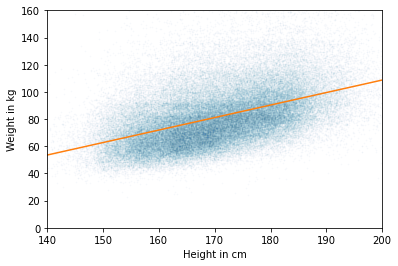

LinregressResult(slope=0.9192115381848179, intercept=-75.12704250330034, rvalue=0.4742030897902462, pvalue=0.0, stderr=0.005632863769802921, intercept_stderr=0.9608860265433051)


In [231]:
# USE PREVIOUS SCATTER PLOT FOR HEIGHT AND WEIGHT WITH JITTER

#Load Data
height = brfss['HTM4']
weight = brfss['WTKG3']

# Generate Jitters
height_jitter = height + np.random.normal(0, 2, size=len(brfss))
weight_jitter = weight + np.random.normal(0, 2, size=len(brfss))

# Re-create Plot
plt.plot(height_jitter, weight_jitter, 'o', markersize=1, alpha=0.02)
plt.axis([140,200,0,160])

# Calculate Line of best fit
subset = brfss.dropna(subset=['WTKG3', 'HTM4'])
xs = subset['HTM4']
ys = subset['WTKG3']
res = linregress(xs,ys)

# Plot Regression Line
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx,fy,'-')

# Plot data and line of best fit
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()
print(res)